# Analyse de sentements en NLP

### Contexte

De nos jours, les achats en ligne sont à la mode et célèbres pour différents produits tels que l'électronique, les vêtements, les produits alimentaires et autres. Par exemple, le commerce électronique vend des produits et offre une option pour évaluer et rédiger des commentaires sur les produits des clients, ce qui est un moyen pratique et important d'identifier la qualité d'un produit. Sur cette base, d'autres consommateurs peuvent décider d'acheter ou non un produit. Cela permet aux vendeurs et les fabricants de connaître les sentiments de leurs produits pour améliorer leurs produits.

 Dans cas particulier , il s'agit d'une base de données sur le E-commerce des vêtements feminin qui s'articule autour des avis rédigés par les clients. Ses neuf fonctionnalités de support offrent un excellent environnement pour analyser le texte à travers ses multiples dimensions. Comme il s'agit de données commerciales réelles, elles ont été rendues anonymes et les références à l'entreprise dans le texte et le corps de l'avis ont été remplacées



### Contenu
Cette base de données comprend 23486 lignes et 10 variables d'entité. Chaque ligne correspond à un avis client et comprend les variables:
- **ID de vêtement**: Entier Variable catégorielle qui fait référence à la pièce spécifique en cours de révision.
- **Age**: Variable entière positive de l'âge des examinateurs.
- **Titre**: variable de chaîne pour le titre de la revue.
- **Texte de révision**: variable de chaîne pour le corps de la révision.
- **Note**: Variable entière ordinale positive pour le score du produit accordé par le client de 1 pire à 5 meilleur.
- **IND recommande**: variable binaire indiquant où le client recommande le produit où 1 est recommandé, 0 n'est pas recommandé.
- **Nombre de commentaires positifs**: Entier positif documentant le nombre d'autres clients qui ont trouvé cet avis positif.
- **Nom de la division**: nom catégorique de la division de haut niveau du produit.
- **Nom du département**: nom catégoriel du nom du département produit.
- **Nom de la classe**: nom catégorique du nom de la classe de produit.


La Librairie **seaborn** est une sous couche de matplotlib qui améliore le visuel des graphiques

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import re 
import string 
from string import punctuation 
import nltk 
from nltk.corpus import stopwords

nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import os
import time
from keras import losses
from tensorflow.keras.models import load_model



[nltk_data] Downloading package stopwords to /Users/vw12/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [2]:
# chager la Base de données des vêtements feminin

df = pd.read_csv('women_clothing_review.csv')
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
# Verifions s'il y a des données manquantes Nan
df.isnull().values.sum() # donc il y a 4697 données manquantes dans notre DataFrame

4697

## Suppression des colonnes non necessaires
- suprimer les colonnes selectionnées et les lignes ou il y a au moin un élément manquant
- Gardez le DataFrame avec des entrées valides dans la même variable.


In [5]:
df = df.drop(['Title', 'Positive Feedback Count', 'Unnamed: 0', ], axis=1)
df.dropna(inplace=True)

In [6]:
df.head(5)

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


In [7]:
print('y a t-il des données manquantes dans base ?:',df.isnull().values.any())
print("--------------------------------------------------------------------")
df.info()


y a t-il des données manquantes dans base ?: False
--------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Clothing ID      22628 non-null  int64 
 1   Age              22628 non-null  int64 
 2   Review Text      22628 non-null  object
 3   Rating           22628 non-null  int64 
 4   Recommended IND  22628 non-null  int64 
 5   Division Name    22628 non-null  object
 6   Department Name  22628 non-null  object
 7   Class Name       22628 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.6+ MB


### Calcule de la polarité basée sur la notation des vetements faite auparavant par les clientes

Appliquons la règle suivante:

- Si la notation existante > 3 alors la polarité est **Positive**
- Si la notation existante == 3 alors la polarité est **Neutre**
- Si la notation existante < 3 alors la polarité est **Negative**


In [8]:
df['Rating_Polarity']=df['Rating'].apply(lambda x:'Positive' if x>3 
                                         else('Neutre' if x==3 else 'Negative'))

In [9]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Rating_Polarity
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive
2,1077,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,Neutre
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive


## Data Visualisation
Traçons la visualisation du nombre de notations :


Text(0.5, 1.0, 'Nombre de notations')

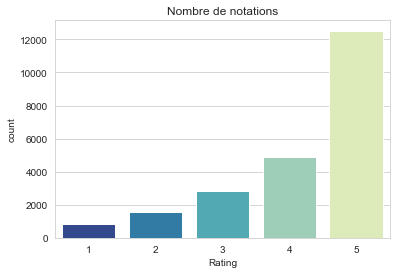

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=df, palette='YlGnBu_r').set_title('Nombre de notations')
#sns.boxplot().set_title('Nombre de notation')

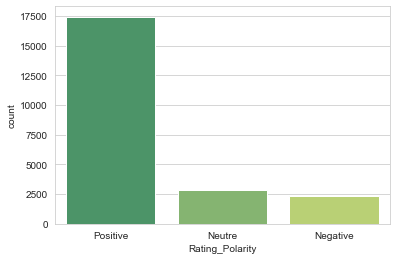

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Rating_Polarity',data=df, palette='summer')

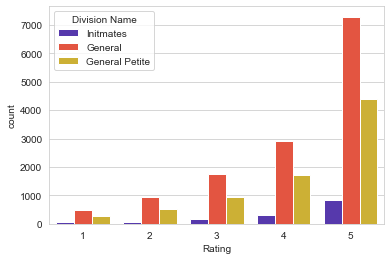

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='Division Name',data=df,palette='CMRmap')

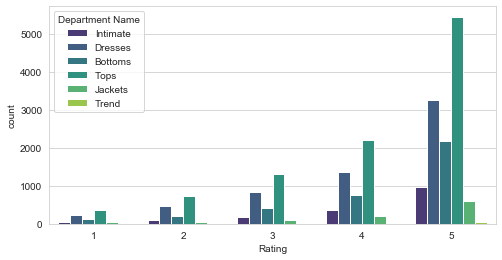

In [13]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='Department Name',data=df,palette='viridis')

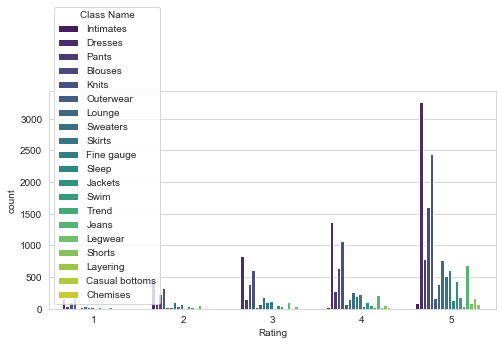

In [14]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='Class Name',data=df,palette='viridis')

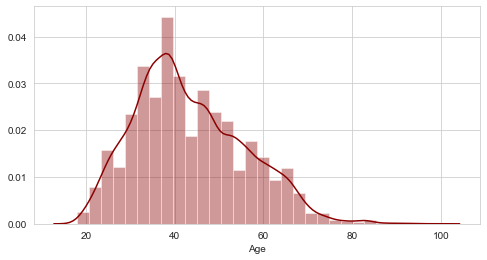

In [15]:
# la distribution de l'age des clients
plt.figure(figsize=(8,4))
sns.distplot(df['Age'],color='darkred',bins=30)

## Data preprocessing

In [16]:
df_Positive = df[df['Rating_Polarity'] == 'Positive'][0:8000]
df_Neutre = df[df['Rating_Polarity'] == 'Neutre']
df_Negative = df[df['Rating_Polarity'] == 'Negative']
len(df_Neutre),len(df_Negative)

(2823, 2370)

On remarque un déséquilibre au niveau de la taille du nombre de **Polarités**, la **Polarité Positive** est très grande. Si On construit un modèle sur ses données, on risque de créer un modèle qui sera en faveur de la Polarité Positive. Pour remedier à ce problème, on utilise l'échantillonnage pour équilibrer la taille des données.
Cette methode consiste à dupliquer aléatoirement les données minoritaires afin d'atteindre une taille qu'on se fixera. Prenons **taille=8000** pour chacune des deux polarités, ensuite on concatène les trois polarités pour constituer notre base d'apprentissage

In [17]:
df_Neutre_over = df_Neutre.sample(8000, replace=True)
df_Negative_over=df_Negative.sample(8000, replace=True)
df=pd.concat([df_Positive,df_Neutre_over,df_Negative_over])
len(df)

24000

Suréchantillonnage aléatoire:
Positive    8000
Neutre      8000
Negative    8000
Name: Rating_Polarity, dtype: int64


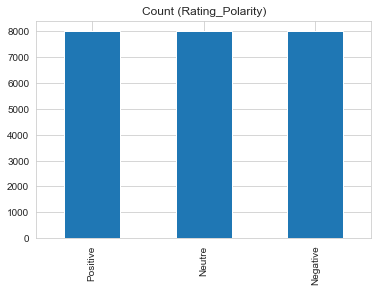

In [18]:
print('Suréchantillonnage aléatoire:')
print(df['Rating_Polarity'].value_counts())
df['Rating_Polarity'].value_counts().plot(kind='bar', title='Count (Rating_Polarity)')

## Text Preprocessing
Il s'agit de retirer les **Stopwords** qui sont des listes de mots en Anglais (le texte est en anglais) definies au préalable soit par l'utilisateur soit par des librairies existantes. Ces listes de mots n'appotent aucune information et sont en générale très courant dans le texte


In [19]:
from nltk.corpus import stopwords
stopwords.words('english')
print(stopwords.words()[612:689])

['our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during']


In [20]:
# un exemple 
text="It is a question of removing the **Stopwords** which are lists of words in English (the text is in English) defined beforehand either by the user or by existing libraries. These word lists do not contain any information and are generally very common in the text."

In [21]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [22]:
get_text_processing(text)

'question removing Stopwords lists words English text English defined beforehand either user existing libraries word lists contain information generally common text'

Appliquons la methode **get_text_processing** à la colonne **Review text**

In [23]:
# Il filtre les chaînes de ponctuation des phrases
 
df['Review'] = df['Review Text'].apply(get_text_processing)
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Rating_Polarity,Review
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive,Absolutely wonderful silky sexy comfortable
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive,Love dress sooo pretty happened find store im ...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous ev...
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive,shirt flattering due adjustable front tie perf...
6,858,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,Positive,aded basket hte last mintue see would look lik...


In [24]:
df = df[['Review', 'Rating_Polarity']]
df.head()

,Review,Rating_Polarity
0,Absolutely wonderful silky sexy comfortable,Positive
1,Love dress sooo pretty happened find store im ...,Positive
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flattering due adjustable front tie perf...,Positive
6,aded basket hte last mintue see would look lik...,Positive


### Appliquons le One hot encoder aux polarités
On applique le **One hot encoder** aux polarités Positive, Neutre,Negative pour avoir les **Dummy** variables

In [25]:
Onehot=pd.get_dummies(df['Rating_Polarity'])
df.drop(["Rating_Polarity"], axis=1, inplace=True)
df = pd.concat([df, Onehot], axis=1)
df.head()

,Review,Negative,Neutre,Positive
0,Absolutely wonderful silky sexy comfortable,0,0,1
1,Love dress sooo pretty happened find store im ...,0,0,1
3,love love love jumpsuit fun flirty fabulous ev...,0,0,1
4,shirt flattering due adjustable front tie perf...,0,0,1
6,aded basket hte last mintue see would look lik...,0,0,1


In [26]:
# appliquons le train_test_split
X = df["Review"].values
y = df.drop("Review", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [27]:
X_train.shape,X_test.shape,y_train.shape

((16800,), (7200,), (16800, 3))

In [28]:
## appliquons la vectorisation
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [29]:
#Fréquence des termes, fréquence inverse des documents
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()


In [30]:
X_test.shape,X_train.shape,y_train.shape,y_test.shape

((7200, 12663), (16800, 12663), (16800, 3), (7200, 3))

## Contruction du modèle

In [37]:
model = Sequential()
model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))


opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [38]:
%%time
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=0,patience=3,restore_best_weights=True)
save= ModelCheckpoint('best_model.h_fc', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

training=model.fit(X_train, y_train, batch_size=256, epochs=20, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop,save])

Epoch 1/20
66/66 [==============================] - 775s 12s/step - loss: 0.5825 - accuracy: 0.7455 - val_loss: 0.3001 - val_accuracy: 0.8906
Epoch 2/20
66/66 [==============================] - 692s 10s/step - loss: 0.0906 - accuracy: 0.9699 - val_loss: 0.2682 - val_accuracy: 0.9196
Epoch 3/20
66/66 [==============================] - 695s 11s/step - loss: 0.0140 - accuracy: 0.9961 - val_loss: 0.3181 - val_accuracy: 0.9244
Epoch 4/20
66/66 [==============================] - 644s 10s/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.3589 - val_accuracy: 0.9206
Epoch 5/20
66/66 [==============================] - 647s 10s/step - loss: 5.0505e-04 - accuracy: 0.9999 - val_loss: 0.4092 - val_accuracy: 0.9228
CPU times: user 3h 20min 42s, sys: 8min 24s, total: 3h 29min 7s
Wall time: 58min 37s


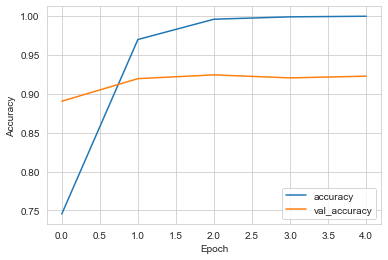

In [39]:
# le graphe de l'entrainement
plt.plot(training.history['accuracy'], label='accuracy')
plt.plot(training.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0., 1])
plt.legend(loc='lower right')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


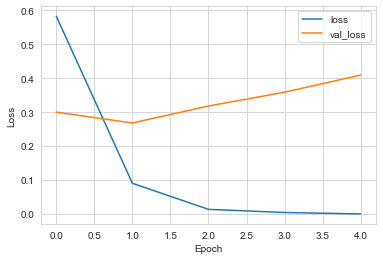

In [40]:
# le graphe de l'entrainement
plt.plot(training.history['loss'], label='loss')
plt.plot(training.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0., 1])
plt.legend(loc='upper right')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# load the saved model
modele = load_model('best_model.h_fc')
loss,acc = modele.evaluate(X_test,  y_test, verbose=1)
train_loss, train_acc = modele.evaluate(X_train, y_train, verbose=0)

print(" loss train accuracy: {:5.2f}%".format(100*train_loss))
print(" train accuracy: {:5.2f}%".format(100*train_acc))
print("**"*30)
print(" loss test  accuracy: {:5.2f}%".format(100*loss))
print(" test  accuracy: {:5.2f}%".format(100*acc))


In [215]:
model_score = model.evaluate (X_test, y_test, batch_size = 64, verbose = 1) 
print ("Exactitude du test:", model_score [1])

113/113 [==============================] - 92s 815ms/step - loss: 0.4197 - accuracy: 0.9219
Exactitude du test: 0.9219444394111633


In [216]:
preds = model.predict (X_test)
preds

array([[1.2262960e-12, 2.8514330e-10, 1.0000000e+00],
       [9.9999988e-01, 3.4518433e-08, 1.1100135e-07],
       [9.9999762e-01, 2.1244068e-06, 2.6815187e-07],
       ...,
       [3.5864025e-01, 6.3982528e-01, 1.5344621e-03],
       [3.3576777e-09, 3.0989775e-09, 1.0000000e+00],
       [3.0903005e-09, 8.8873350e-08, 9.9999988e-01]], dtype=float32)

In [217]:
len(preds)

7200

In [222]:
np.argmax(preds,axis=1)

array([2, 0, 0, ..., 1, 2, 2])

https://medium.com/towards-artificial-intelligence/sentiment-analysis-opinion-mining-with-python-nlp-tutorial-d1f173ca4e3c